In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [337]:
data=pd.read_excel(r'lgd_data.xlsx')
data.head()

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
0,238203,729,36,3.81,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South,0.010000
1,170008,745,36,6.68,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South,0.757182
2,198937,681,24,8.38,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West,0.575147
3,262045,684,48,5.45,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998
4,243378,758,72,6.64,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000


In [338]:
data.describe(include='all')

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
count,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000,40000,40000,40000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,North,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13420,8163,20161,10165,NaN
mean,149811.070400,700.667300,47.91060,6.499560,60069.306750,79.982225,30.08045,5.002275,0.998925,NaN,NaN,NaN,NaN,0.320288
std,49836.964295,49.974161,17.00847,1.504729,19926.497499,9.986641,9.98215,2.015557,0.818530,NaN,NaN,NaN,NaN,0.341183
min,-82998.000000,505.000000,24.00000,0.380000,-17513.000000,37.000000,-13.00000,-5.000000,0.000000,NaN,NaN,NaN,NaN,0.009717
25%,116398.000000,667.000000,36.00000,5.480000,46567.500000,73.000000,23.00000,4.000000,0.000000,NaN,NaN,NaN,NaN,0.010001
50%,149822.500000,701.000000,48.00000,6.490000,60058.000000,80.000000,30.00000,5.000000,1.000000,NaN,NaN,NaN,NaN,0.197368
75%,183328.000000,734.000000,60.00000,7.520000,73416.750000,87.000000,37.00000,6.000000,2.000000,NaN,NaN,NaN,NaN,0.572629


In [339]:
data.isnull().sum()

Exposure Amount ($)           0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
LGD%                          0
dtype: int64

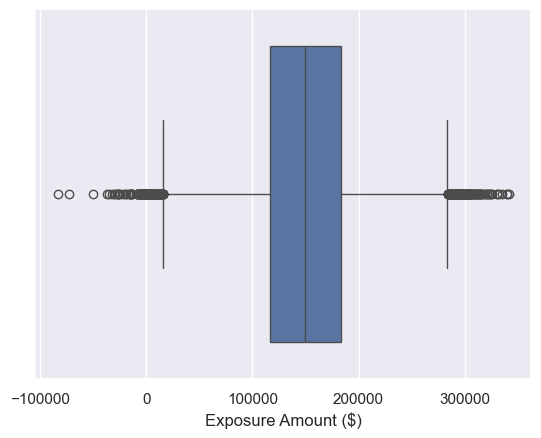

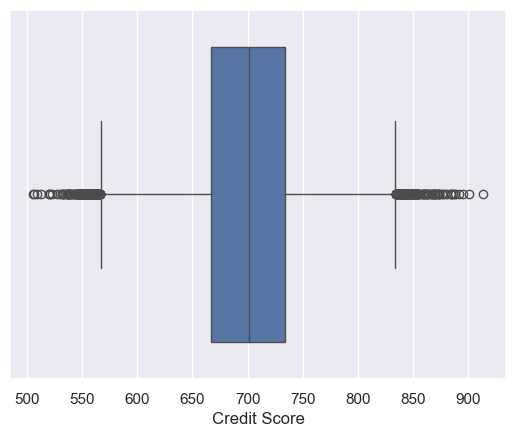

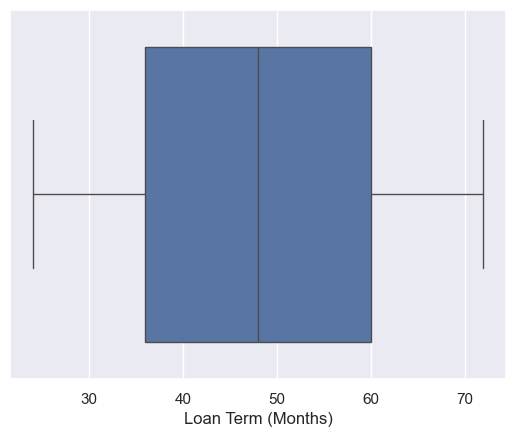

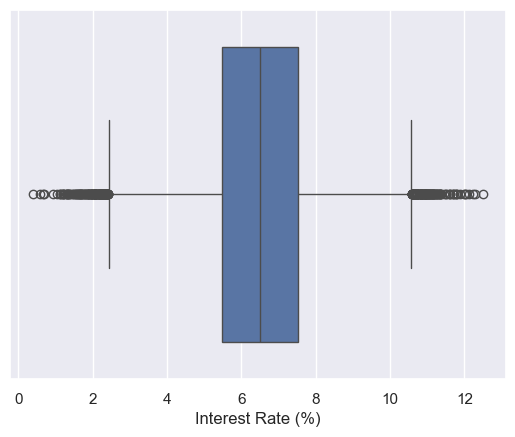

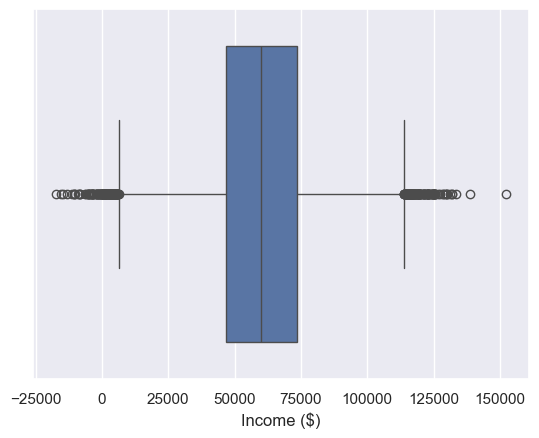

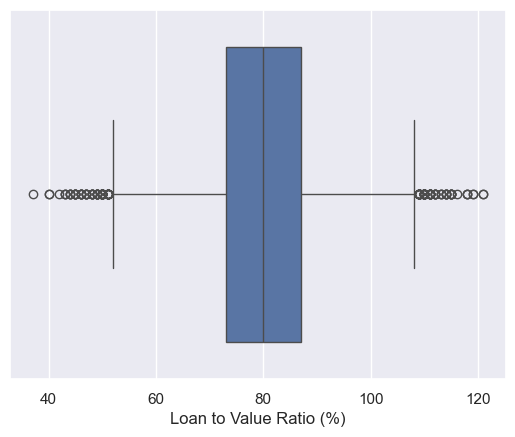

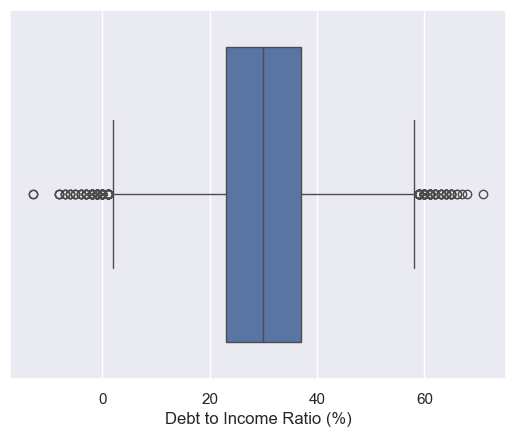

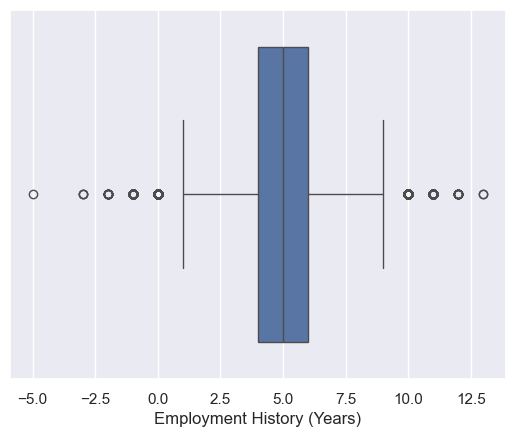

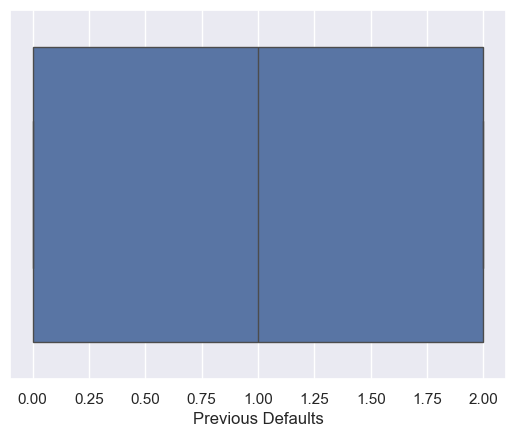

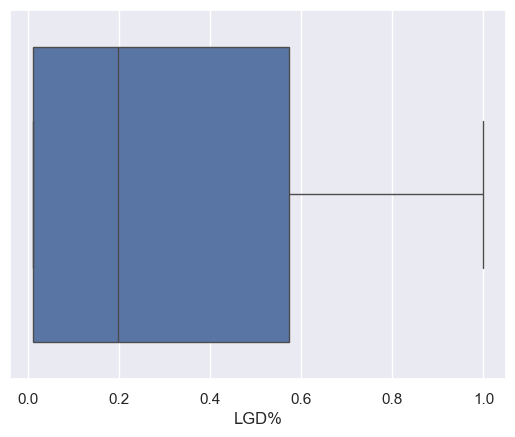

In [340]:
for i in data.columns:
    if data[i].dtypes!=object:
        sns.boxplot(data=data,x=data[i])
        plt.show()
    

In [341]:
q1=data.quantile(0.25, numeric_only=True)
q3=data.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

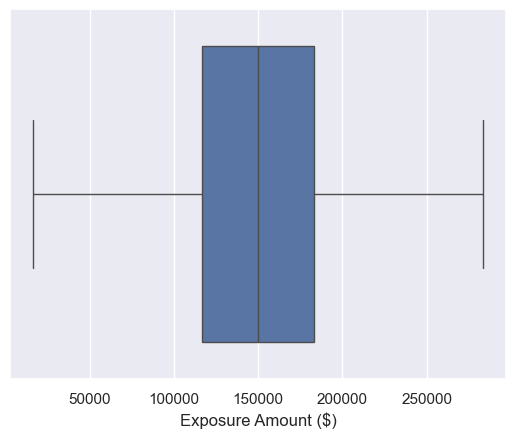

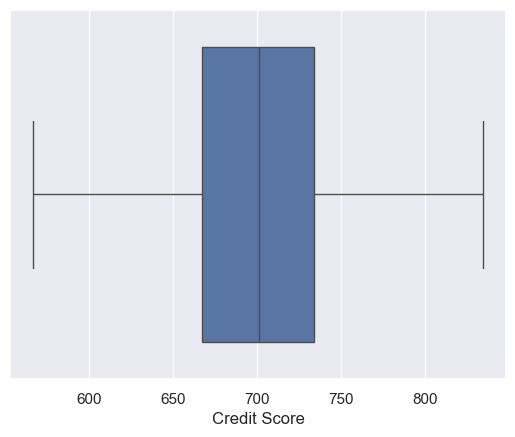

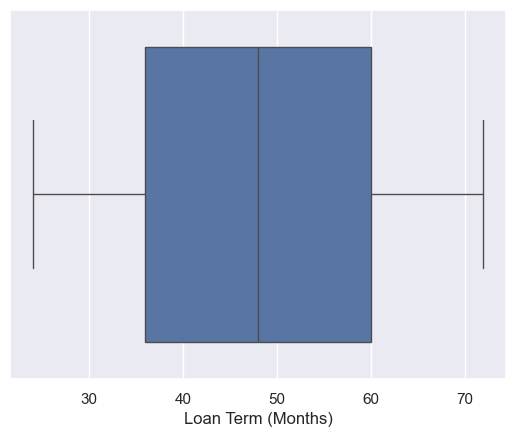

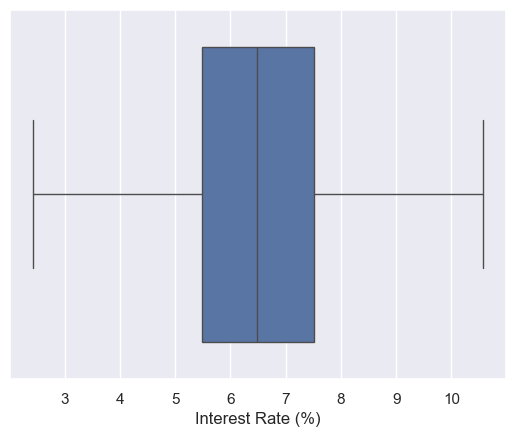

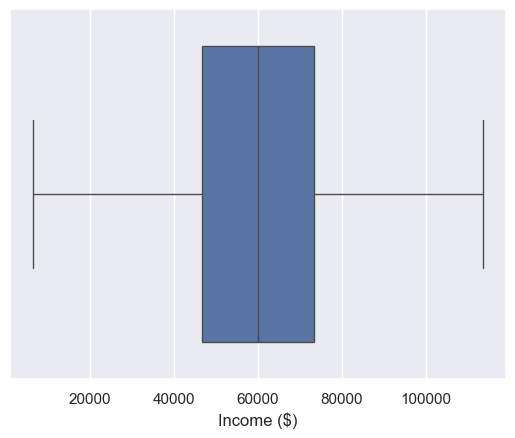

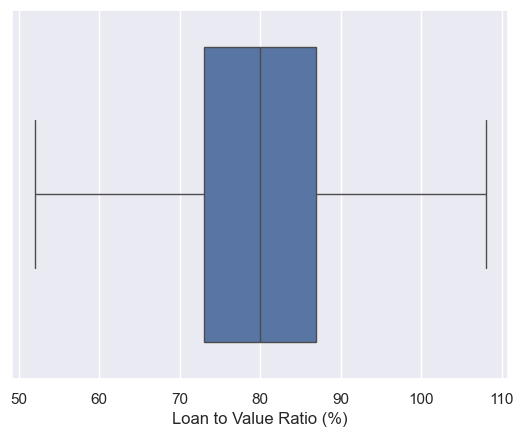

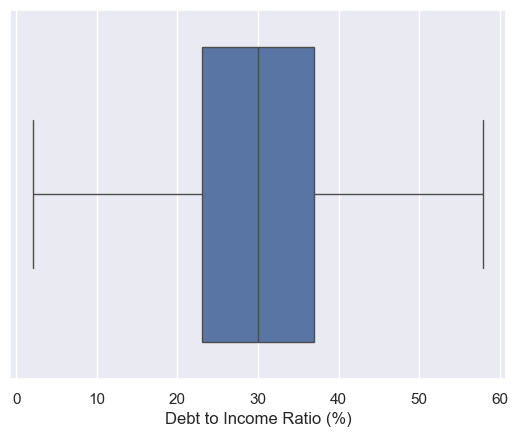

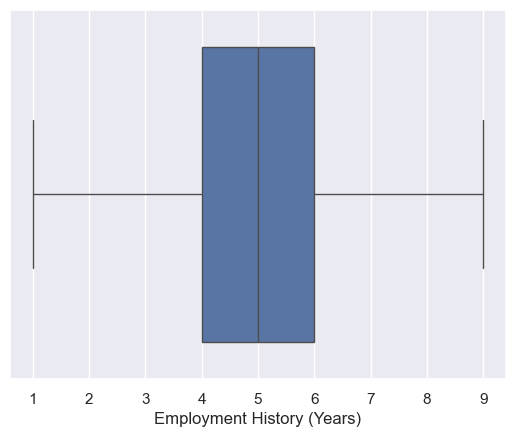

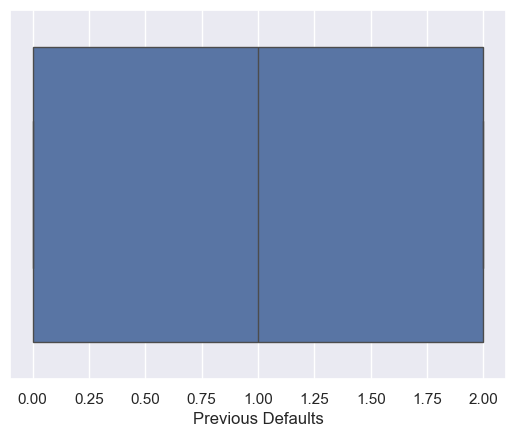

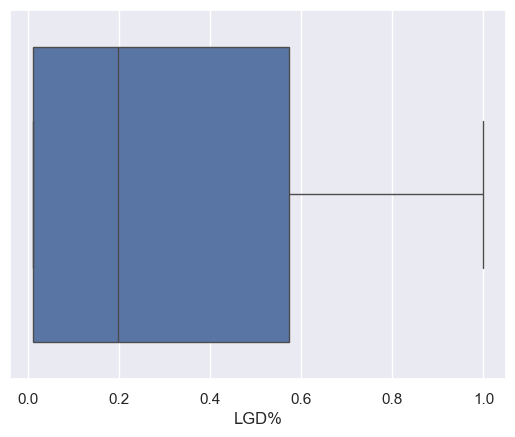

In [342]:
for i in data.columns:
    if data[i].dtypes!=object:
        data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
        data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [343]:
data.columns

Index(['Exposure Amount ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region', 'LGD%'],
      dtype='object')

In [344]:
statistics=['mean']

In [345]:
for i in statistics:
    result = data.groupby(['Region']).agg({'Income ($)': [i]})
    result.columns = [f'Income_{i}_by_Region']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Region', how='left')
    
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income_mean_by_Region
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702


In [348]:
for i in statistics:
    result = data.groupby(['Credit Score']).agg({'Previous Defaults': [i]})
    result.columns = [f'Previous_Defaults_{i}_by_Credit_Score']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Credit Score', how='left')
    
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score_x,Previous_Defaults_mean_by_Credit_Score_y
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340,0.938525,0.938525
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340,1.022321,1.022321
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702,1.030303,1.030303
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702,0.985866,0.985866
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837,1.046512,1.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837,0.986395,0.986395
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702,1.033333,1.033333
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702,1.000000,1.000000
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702,0.963087,0.963087


In [349]:
data.columns

Index(['Exposure Amount ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region', 'LGD%', 'Income_mean_by_Region',
       'Previous_Defaults_mean_by_Credit_Score_x',
       'Previous_Defaults_mean_by_Credit_Score_y'],
      dtype='object')

In [359]:
for i in data.columns[-2:]:
    print(i)
    print(data[i].value_counts())

Previous_Defaults_mean_by_Credit_Score_x
Previous_Defaults_mean_by_Credit_Score_x
1.000000    1453
1.030303     528
0.953488     430
1.008721     344
0.959184     343
            ... 
1.300000      10
1.200000      10
1.333333       9
1.222222       9
0.625000       8
Name: count, Length: 234, dtype: int64
Previous_Defaults_mean_by_Credit_Score_y
Previous_Defaults_mean_by_Credit_Score_y
1.000000    1453
1.030303     528
0.953488     430
1.008721     344
0.959184     343
            ... 
1.300000      10
1.200000      10
1.333333       9
1.222222       9
0.625000       8
Name: count, Length: 234, dtype: int64


In [360]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        
        print(f'Column: {i}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Exposure Amount ($)
p-value: 0.0
Data does not look normally distributed

Column: Credit Score
p-value: 0.0
Data does not look normally distributed

Column: Loan Term (Months)
p-value: 0.0
Data does not look normally distributed

Column: Interest Rate (%)
p-value: 0.0
Data does not look normally distributed

Column: Income ($)
p-value: 0.0
Data does not look normally distributed

Column: Loan to Value Ratio (%)
p-value: 0.0
Data does not look normally distributed

Column: Debt to Income Ratio (%)
p-value: 0.0
Data does not look normally distributed

Column: Employment History (Years)
p-value: 0.0
Data does not look normally distributed

Column: Previous Defaults
p-value: 0.0
Data does not look normally distributed

Column: LGD%
p-value: 0.0
Data does not look normally distributed

Column: Income_mean_by_Region
p-value: 0.0
Data does not look normally distributed

Column: Previous_Defaults_mean_by_Credit_Score_x
p-value: 0.0
Data does not look normally distributed

Column: Previ

In [361]:
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target

In [362]:
target_result = target_correlation(data, 'LGD%')

target_result

,Variable,Correlation with Target
0,Exposure Amount ($),0.108719
1,Credit Score,0.489755
2,Loan Term (Months),0.337089
3,Interest Rate (%),0.165559
4,Income ($),0.405091
5,Loan to Value Ratio (%),0.240004
6,Debt to Income Ratio (%),0.319163
7,Employment History (Years),0.160256
8,Previous Defaults,0.253319


In [363]:
def intercorrelation(data, target, threshold=0.6):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
  #  print(highly_correlated_variables)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
  #  print(independent_variable_pairs)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent


In [364]:
intercorrelated_result = intercorrelation(data, 'LGD%')

intercorrelated_result

,Variable 1,Variable 2


In [365]:
target_result.Variable.tolist()

['Exposure Amount ($)',
 'Credit Score',
 'Loan Term (Months)',
 'Interest Rate (%)',
 'Income ($)',
 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults']

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [
 'Exposure Amount ($)',
  #'Credit Score',
 'Loan Term (Months)',
  #'Interest Rate (%)',
 'Income ($)',
  #'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults'
                                        ])

vif_result


,VIF,Features
0,8.070681,Exposure Amount ($)
1,7.324425,Loan Term (Months)
2,8.120835,Income ($)
3,8.116730,Debt to Income Ratio (%)
4,6.504986,Employment History (Years)
5,2.405987,Previous Defaults


In [367]:
data.dtypes

Exposure Amount ($)                         float64
Credit Score                                float64
Loan Term (Months)                          float64
Interest Rate (%)                           float64
Income ($)                                  float64
Loan to Value Ratio (%)                     float64
Debt to Income Ratio (%)                    float64
Employment History (Years)                  float64
Previous Defaults                           float64
Home Ownership                               object
Loan Purpose                                 object
Loan Type                                    object
Region                                       object
LGD%                                        float64
Income_mean_by_Region                       float64
Previous_Defaults_mean_by_Credit_Score_x    float64
Previous_Defaults_mean_by_Credit_Score_y    float64
dtype: object

In [368]:
data.columns

Index(['Exposure Amount ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region', 'LGD%', 'Income_mean_by_Region',
       'Previous_Defaults_mean_by_Credit_Score_x',
       'Previous_Defaults_mean_by_Credit_Score_y'],
      dtype='object')

In [369]:
data=data[['Home Ownership', 'Loan Purpose', 'Loan Type', 'Region', 'Previous Defaults','Employment History (Years)',
           'Loan Term (Months)', 'Exposure Amount ($)', 'Income ($)', 'Debt to Income Ratio (%)','LGD%']]
data

,Home Ownership,Loan Purpose,Loan Type,Region,Previous Defaults,Employment History (Years),Loan Term (Months),Exposure Amount ($),Income ($),Debt to Income Ratio (%),LGD%
0,Rent,Home Improvement,Adjustable Rate,South,2.0,4.0,36.0,238203.0,47603.0,24.0,0.010000
1,Mortgage,Auto Loan,Adjustable Rate,South,2.0,4.0,36.0,170008.0,67474.0,43.0,0.757182
2,Own,Personal Loan,Fixed Rate,West,1.0,6.0,24.0,198937.0,77036.0,46.0,0.575147
3,Mortgage,Home Purchase,Adjustable Rate,West,0.0,1.0,48.0,262045.0,55083.0,24.0,0.009998
4,Mortgage,Debt Consolidation,Fixed Rate,North,0.0,5.0,72.0,243378.0,70148.0,40.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
39995,Mortgage,Debt Consolidation,Adjustable Rate,North,0.0,3.0,24.0,77140.0,71515.0,17.0,0.009995
39996,Rent,Auto Loan,Fixed Rate,West,0.0,3.0,72.0,250556.0,45326.0,34.0,0.834943
39997,Rent,Debt Consolidation,Fixed Rate,West,1.0,7.0,60.0,234493.0,48418.0,24.0,0.897571
39998,Mortgage,Personal Loan,Adjustable Rate,West,0.0,6.0,36.0,159998.0,85987.0,37.0,0.445537


In [370]:
data = pd.get_dummies(data, drop_first=True, dtype=int)

data

,Previous Defaults,Employment History (Years),Loan Term (Months),Exposure Amount ($),Income ($),Debt to Income Ratio (%),LGD%,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,2.0,4.0,36.0,238203.0,47603.0,24.0,0.010000,0,1,0,1,0,0,0,0,1,0
1,2.0,4.0,36.0,170008.0,67474.0,43.0,0.757182,0,0,0,0,0,0,0,0,1,0
2,1.0,6.0,24.0,198937.0,77036.0,46.0,0.575147,1,0,0,0,0,1,1,0,0,1
3,0.0,1.0,48.0,262045.0,55083.0,24.0,0.009998,0,0,0,0,1,0,0,0,0,1
4,0.0,5.0,72.0,243378.0,70148.0,40.0,1.000000,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,3.0,24.0,77140.0,71515.0,17.0,0.009995,0,0,1,0,0,0,0,1,0,0
39996,0.0,3.0,72.0,250556.0,45326.0,34.0,0.834943,0,1,0,0,0,0,1,0,0,1
39997,1.0,7.0,60.0,234493.0,48418.0,24.0,0.897571,0,1,1,0,0,0,1,0,0,1
39998,0.0,6.0,36.0,159998.0,85987.0,37.0,0.445537,0,0,0,0,0,1,0,0,0,1


In [371]:
targets = data['LGD%']

inputs = data.drop(['LGD%'],axis=1)

In [372]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs) 

inputs_scaled = scaler.transform(inputs)

data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,Previous Defaults,Employment History (Years),Loan Term (Months),Exposure Amount ($),Income ($),Debt to Income Ratio (%),Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,1.223032,-0.517597,-0.700283,1.786404,-0.629277,-0.612479,-0.709601,1.407347,-0.501484,1.988973,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
1,1.223032,-0.517597,-0.700283,0.408114,0.373902,1.300527,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
2,0.001313,0.513114,-1.405823,0.992798,0.856635,1.602580,1.409243,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,1.008083,-0.583701,-0.575772,1.729284
3,-1.220405,-2.063665,0.005256,2.268275,-0.251653,-0.612479,-0.709601,-0.710557,-0.501484,-0.502772,2.027763,-0.496208,-0.991982,-0.583701,-0.575772,1.729284
4,-1.220405,-0.002242,1.416336,1.890996,0.508897,0.998473,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,1.008083,1.713205,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.220405,-1.032953,-1.405823,-1.468843,0.577910,-1.317271,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,-0.991982,1.713205,-0.575772,-0.578274
39996,-1.220405,-1.032953,1.416336,2.036071,-0.744231,0.394366,-0.709601,1.407347,-0.501484,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39997,0.001313,1.028470,0.710796,1.711421,-0.588132,-0.612479,-0.709601,1.407347,1.994082,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39998,-1.220405,0.513114,-0.700283,0.205801,1.308522,0.696420,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,-0.991982,-0.583701,-0.575772,1.729284


In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=42)

In [374]:
reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [380]:
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [381]:

from sklearn import metrics

# Float format
pd.options.display.float_format= '{:.2f}'.format

# Train metrics
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

# Test metrics
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

# DataFrame
results_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
})

print(results_df)


  Metric  Train  Test
0    MAE   0.20  0.20
1    MSE   0.06  0.06
2   RMSE   0.24  0.25
3     R2   0.49  0.48


In [382]:
results = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    reg.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = reg.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = reg.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    results.append({'Variable': i, 'Train R2': train_r2, 'Test R2': test_r2})

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

results_df_sorted


,Variable,Train R2,Test R2
4,Income ($),0.17,0.16
2,Loan Term (Months),0.11,0.11
5,Debt to Income Ratio (%),0.11,0.10
0,Previous Defaults,0.06,0.06
1,Employment History (Years),0.03,0.03
3,Exposure Amount ($),0.01,0.01
15,Region_West,0.00,-0.00
12,Loan Type_Fixed Rate,0.00,-0.00
10,Loan Purpose_Home Purchase,0.00,-0.00
7,Home Ownership_Rent,0.00,-0.00


In [383]:
inputs = data_scaled[['Income ($)','Loan Term (Months)','Debt to Income Ratio (%)','Previous Defaults','Employment History (Years)',
'Exposure Amount ($)']]

In [384]:
from sklearn.model_selection import train_test_split

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [385]:
reg = LinearRegression()
reg.fit(X_train_uni,y_train_uni)

LinearRegression()

In [388]:
y_pred_uni = reg.predict(X_test_uni)
y_pred_train_uni = reg.predict(X_train_uni)

In [389]:
mae_test = metrics.mean_absolute_error(y_test_uni, y_pred_uni)
mse_test = metrics.mean_squared_error(y_test_uni, y_pred_uni)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test_uni, y_pred_uni)

mae_train = metrics.mean_absolute_error(y_train_uni, y_pred_train_uni)
mse_train = metrics.mean_squared_error(y_train_uni, y_pred_train_uni)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train_uni, y_pred_train_uni)




results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.20,0.20
1,MSE,0.06,0.06
2,RMSE,0.24,0.24
3,R2,0.49,0.49


In [390]:
#deployment

In [436]:
data1=pd.read_excel(r'lgd_data_deploy.xlsx')
data1.head()

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,153539,715,36,6.85,57712,92,23,6,1,Mortgage,Home Improvement,Adjustable Rate,West
1,137842,713,36,6.65,37490,83,41,7,0,Mortgage,Debt Consolidation,Fixed Rate,East
2,187289,606,72,5.00,35857,79,46,7,1,Mortgage,Home Improvement,Adjustable Rate,East
3,98051,817,72,6.01,37531,91,20,4,2,Mortgage,Home Improvement,Fixed Rate,East
4,120672,659,36,5.88,84892,93,28,2,0,Rent,Debt Consolidation,Adjustable Rate,East


In [437]:
inputs.columns

Index(['Income ($)', 'Loan Term (Months)', 'Debt to Income Ratio (%)',
       'Previous Defaults', 'Employment History (Years)',
       'Exposure Amount ($)'],
      dtype='object')

In [438]:
data1=data1[['Income ($)','Loan Term (Months)','Debt to Income Ratio (%)','Previous Defaults','Employment History (Years)',
'Exposure Amount ($)']]
data1

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($)
0,57712,36,23,1,6,153539
1,37490,36,41,0,7,137842
2,35857,72,46,1,7,187289
3,37531,72,20,2,4,98051
4,84892,36,28,0,2,120672
...,...,...,...,...,...,...
395,66358,24,23,1,4,83740
396,71919,36,38,1,5,129005
397,28667,72,42,0,4,129767
398,55885,24,38,0,5,196097


In [439]:
data1.describe(include='all')

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($)
count,400.00,400.00,400.00,400.00,400.00,400.00
mean,59572.30,48.00,29.89,0.95,4.98,149994.36
std,19801.51,17.33,9.59,0.78,1.98,47437.86
min,-10521.00,24.00,-1.00,0.00,0.00,-8970.00
25%,47053.25,36.00,23.00,0.00,4.00,117812.75
50%,60092.50,48.00,30.00,1.00,5.00,149422.00
75%,71688.50,60.00,36.00,2.00,6.00,182459.00
max,152467.00,72.00,52.00,2.00,11.00,270686.00


In [440]:
data1.isnull().sum()

Income ($)                    0
Loan Term (Months)            0
Debt to Income Ratio (%)      0
Previous Defaults             0
Employment History (Years)    0
Exposure Amount ($)           0
dtype: int64

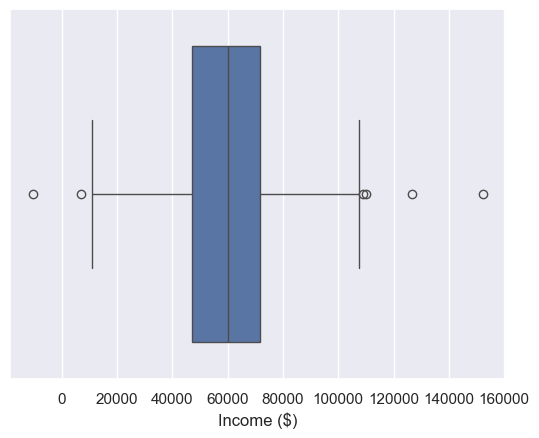

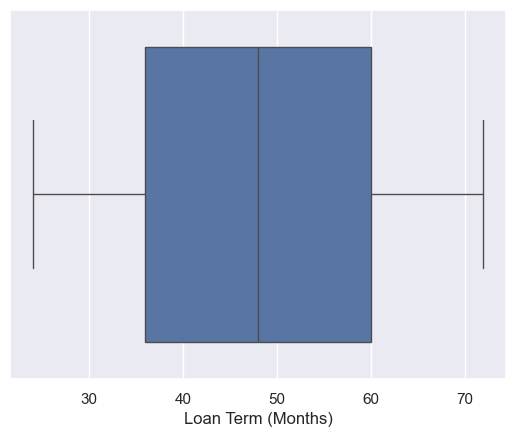

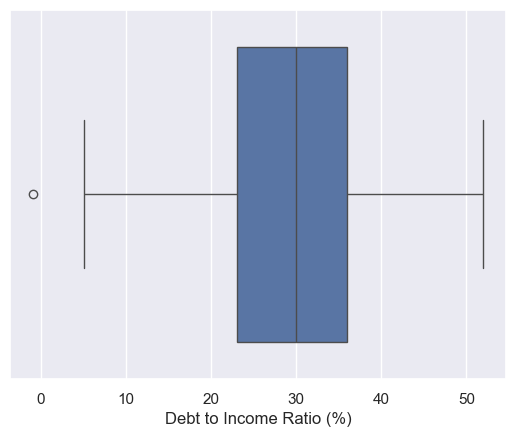

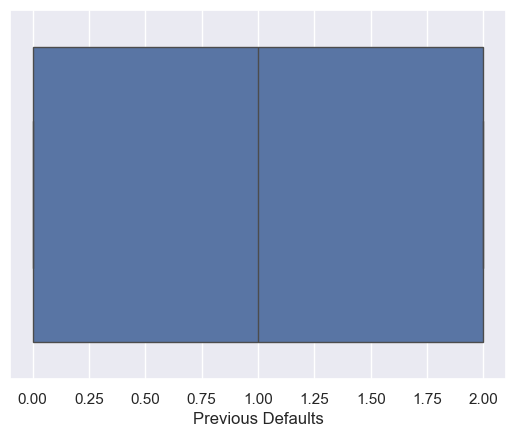

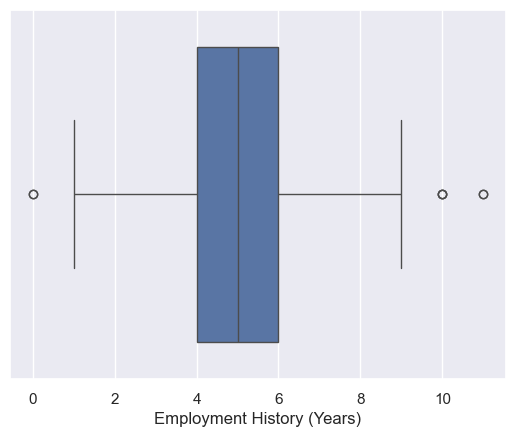

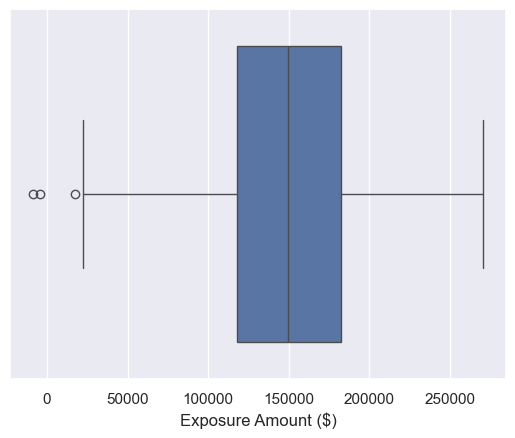

In [441]:
for i in data1.columns:
    if data1[i].dtypes!=object:
        sns.boxplot(data=data1,x=i)
        plt.show()
    

In [442]:
q1=data1.quantile(0.25, numeric_only=True)
q3=data1.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

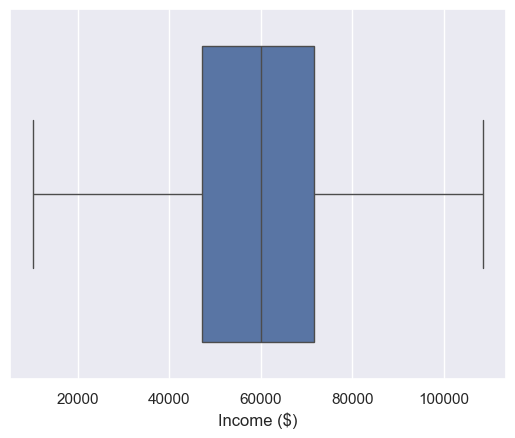

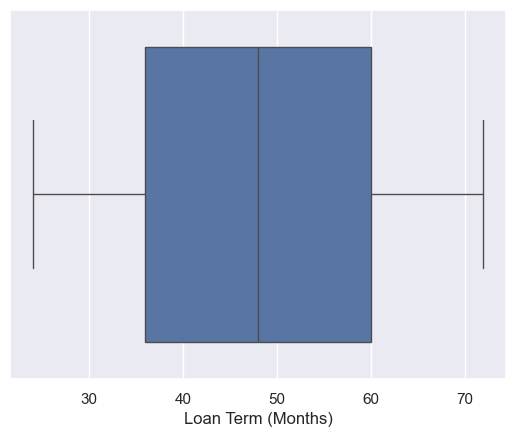

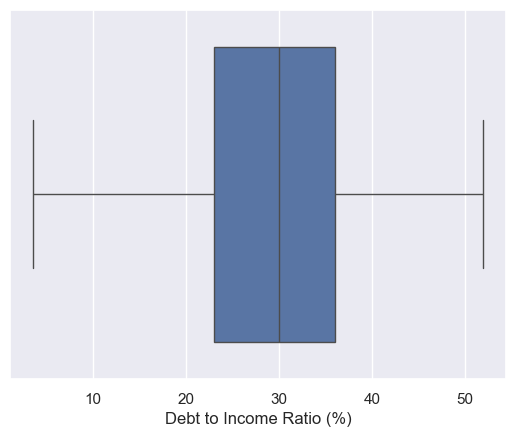

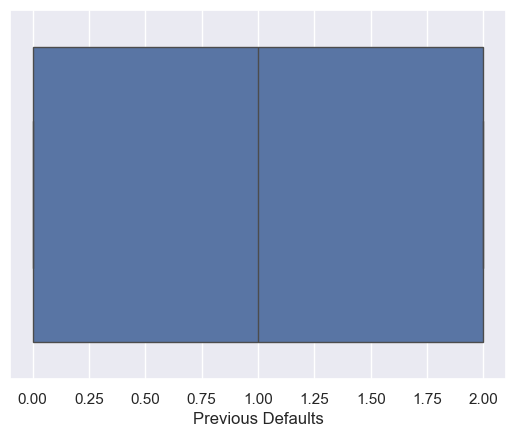

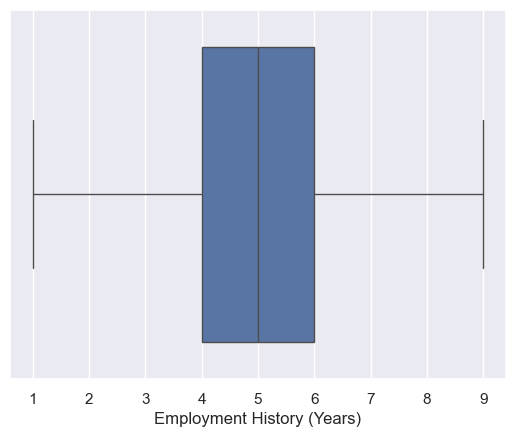

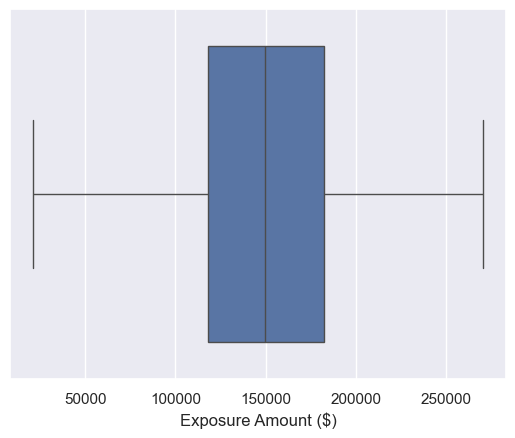

In [443]:
for i in data1.columns:
    if data1[i].dtypes!=object:
        data1[i] = np.where(data1[i] > Upper[i],Upper[i],data1[i])
        data1[i] = np.where(data1[i] < Lower[i],Lower[i],data1[i])
        sns.boxplot(data=data1,x=i)
        plt.show()

In [444]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(data1)

inputs_deploy_scaled = scaler.transform(data1)

data_deploy_scaled = pd.DataFrame(inputs_deploy_scaled, columns=data1.columns)

data_deploy_scaled

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($)
0,-0.09,-0.69,-0.72,0.06,0.54,0.07
1,-1.15,-0.69,1.16,-1.22,1.06,-0.26
2,-1.24,1.39,1.69,0.06,1.06,0.79
3,-1.15,1.39,-1.04,1.33,-0.50,-1.11
4,1.33,-0.69,-0.20,-1.22,-1.55,-0.63
...,...,...,...,...,...,...
395,0.36,-1.39,-0.72,0.06,-0.50,-1.41
396,0.65,-0.69,0.85,0.06,0.02,-0.45
397,-1.62,1.39,1.27,-1.22,-0.50,-0.43
398,-0.19,-1.39,0.85,-1.22,0.02,0.98


In [445]:
data_deploy_scaled['predicted_LGD%'] = reg.predict(data_deploy_scaled)
data_deploy_scaled

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($),predicted_LGD%
0,-0.09,-0.69,-0.72,0.06,0.54,0.07,0.19
1,-1.15,-0.69,1.16,-1.22,1.06,-0.26,0.15
2,-1.24,1.39,1.69,0.06,1.06,0.79,0.59
3,-1.15,1.39,-1.04,1.33,-0.50,-1.11,0.25
4,1.33,-0.69,-0.20,-1.22,-1.55,-0.63,0.19
...,...,...,...,...,...,...,...
395,0.36,-1.39,-0.72,0.06,-0.50,-1.41,0.06
396,0.65,-0.69,0.85,0.06,0.02,-0.45,0.42
397,-1.62,1.39,1.27,-1.22,-0.50,-0.43,0.24
398,-0.19,-1.39,0.85,-1.22,0.02,0.98,0.16
